<a href="https://colab.research.google.com/github/rlawogus1115/test/blob/main/2_linear_model_lab_ipynb_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Linear Model</h1>

# import


In [ ]:
import numpy as np
import random
import pandas as pd
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression

# Linear Regression

## 최소 제곱법(Least Sqaure), 실습 - 직접구현

* `X = np.array([10,9,3,2]) `
* `y = np.array([90,80,50,30])`

X:7,y: 69.1


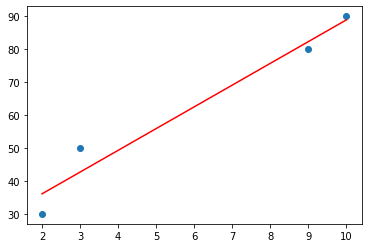

In [ ]:
X = np.array([10,9,3,2]) 
y = np.array([90,80,50,30])

plt.plot(X, y, 'o')

a = np.sum((X-np.mean(X))*(y-np.mean(y))) / np.sum((X-np.mean(X))**2)
b = np.mean(y) - a*np.mean(X)

plt.plot(X,a*X+b,'r-')
print("X:7,y:",a*7+b)



* x = 7일 때 예측

###  Scikit-learn API
* `sklearn.linear_model.LinearRegression(fit_intercept, normalize)`
    * OLS(Oerdinary Least Sqaures) 최소 제곱 추정 방식 구현
    * `fit_intercept=True` : bias 사용 여부
    * `normalize = False` : 수행 전에 입력 데이타 정규화, `fit_inercept=False`인 경우 무시
    * `coef_` :  W 계수
    * `intercept_` : bias 절편

[6.6] 22.899999999999977


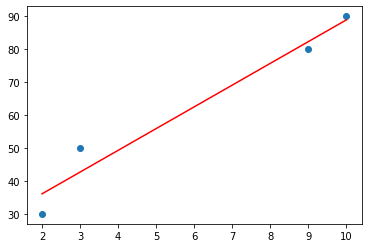

In [ ]:
from sklearn.linear_model import LinearRegression

X = np.array([10,9,3,2]) 
y = np.array([90,80,50,30])

plt.plot(X,y,'o')

lr = LinearRegression()
lr.fit(X.reshape(-1,1),y)

a = lr.coef_
b = lr.intercept_

print(a,b)
plt.plot(X,a[0]*X+b,'r-')

* x = 7 일 때 예측

In [ ]:
lr.predict([[7]])

array([69.1])

### 이상치를 포함한 데이터 예시

a:3.4285714285714284, b:34.0


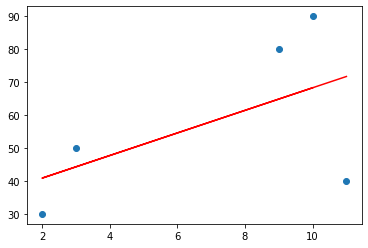

In [ ]:
X2 = np.array([10,9,3,2, 11]) 
y2 = np.array([90,80,50,30, 40])

plt.plot(X2, y2, 'o')

a = np.sum( (X2-X2.mean()) * (y2-y2.mean())) /  np.sum( (X2-X2.mean())**2 )
b = y2.mean() - a*X2.mean()
print(f"a:{a}, b:{b}")

plt.plot(X2, X2*a+b, 'r-' )

## Gradient Descent, 실습
#### 샘플 데이타 생성
* 단순화 하기 위해서 계수 1개만으로 제한
* m개의 샘플 데이타를 만든다.
* X 데이타 : np.arange(m) 
    * 0 ~ m
* y 데이타 : X * 2
    * 데이타가 너무 정직해서 약간의 노이즈를 추가

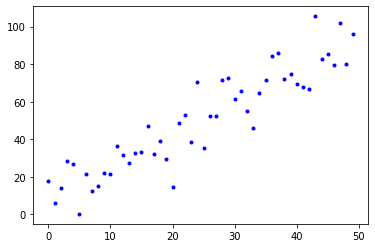

In [ ]:
np.random.seed(0)
m = 50 #sample count
X = np.arange(m)
y = X  * 2 # W = 2, b=0(bias 생략) 
y = y + 10 * np.random.randn(m) # adding noise

plt.plot(X, y, 'b.')

#### 선형 회귀 표시
* 데이타의 선회 회귀를 직선으로 표시
* 최종적으로 이 선을 만족하는 W를 찾으면 성공

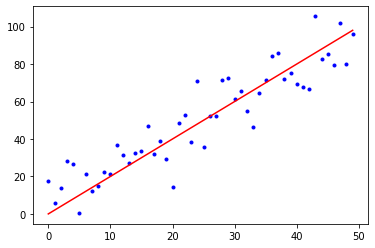

In [ ]:
plt.plot(X, y, 'b.')
plt.plot(X, X*2, 'r')

#### Hypothesis와 Cost함수

Text(0, 0.5, '$cost(W)$')

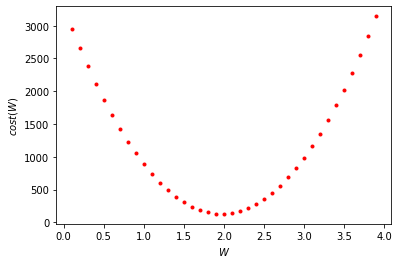

In [ ]:
np.random.seed(0)
m = 50 #sample count
X = np.arange(m)
y = X  * 2 # W = 2, b=0(bias 생략) 
y = y + 10 * np.random.randn(m) # adding noise

w_range = np.arange(0.1, 4, 0.1) 
costs = np.array([])
for i, w in enumerate(w_range):
    h = w*X
    cost = 1/m * np.sum( (h - y)**2)
    costs = np.append(costs, cost)

plt.plot(w_range, costs, 'r.')
plt.xlabel('$W$')
plt.ylabel('$cost(W)$')

#### Cost 함수와 Gradient

* `plt.plot(w_range, gradient*(w_range-w) +cost) #gradient는 x=0을 기준으로 계산되었기 때문에 `

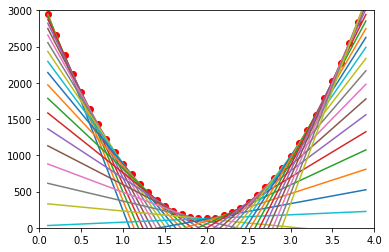

In [ ]:
plt.plot(w_range, costs, 'ro')
for w, cost in zip(w_range, costs):
    h = w*X
    gradient =  2/m * np.sum( (h-y) * X)
    plt.plot(w_range, gradient*(w_range-w) +cost) #gradient는 x=0을 기준으로 계산되었기 때문에 
    plt.axis([0, 4, 0, 3000])

#### Batch Gradient Descent
* 전체 샘플에 대해서 경사 하강법을 이용해서 예측

i: 0 cost: 1757.134425887178 gradient: -2295.454695678768 W: 0.5488135039273248
i: 20 cost: 183.75332759571535 gradient: -425.2032314542253 W: 1.7054316017780005
i: 40 cost: 129.7662784911078 gradient: -78.76338765451109 W: 1.919680113713507
i: 60 cost: 127.91383379465871 gradient: -14.58989672679054 W: 1.9593668737182817
i: 80 cost: 127.85027130309244 gradient: -2.7025892719615503 W: 1.9667183316371617
i: 100 cost: 127.84809029853024 gradient: -0.5006196349222006 W: 1.9680800939358873
103


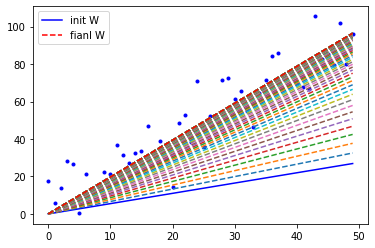

In [ ]:
plt.plot(X, y, 'b.')
np.random.seed(0)
W = np.random.rand()
plt.plot(X,W*X,'b-',label='init W')

lr = 0.00005 #learning rate
epochs = 201 # 학습 횟수
suspend = 0.00001 # cost 차이 기준
pre_cost =0
for i in range(epochs):
  h = W*X
  loss = h-y
  cost = 1/m*np.sum(loss**2)
  g = 2/m*np.sum(loss*X)  
  if abs(pre_cost - cost) < suspend:
    print(i)
    break
  pre_cost = cost
  if i%20 == 0:
    print('i:',i,'cost:',cost,'gradient:',g,'W:',W)
  W = W-g*lr
  plt.plot(X,W*X,'--')
plt.plot(X,W*X,'r--',label='fianl W')
plt.legend()

#### Stochastic Gradient Descent
스타케스틱

* `batchs = 5`

initial W 0.7151893663724195
epoch: 0 cost: 2.679554258680716e+21  gradient: 2859720195664.8745  W: -26723204447.566948 learn_rate: 0.01
epoch: 5 cost: 2.0266240934521957e+74  gradient: 6.5411075408498486e+38  W: -1.9798066116914806e+35 learn_rate: 0.00125
epoch: 10 cost: 1.1269208350750011e+52  gradient: -5.438696358416107e+27  W: -5.182868215172519e+23 learn_rate: 0.0006666666666666666
epoch: 15 cost: 1.1028863672030253e+17  gradient: -13608698643.909042  W: -10022775.897209264 learn_rate: 0.00045454545454545455
epoch: 20 cost: 36.02847445244211  gradient: -149.7764338693839  W: 2.155488511394711 learn_rate: 0.0003448275862068965
epoch: 25 cost: 50.10734441636812  gradient: -261.8867000648224  W: 2.1248621666794794 learn_rate: 0.0002777777777777778
epoch: 30 cost: 8.988111799842299  gradient: -167.95067248262114  W: 2.144415648073326 learn_rate: 0.00023255813953488373
epoch: 35 cost: 211.2700664991759  gradient: -147.294726419791  W: 1.939412373910418 learn_rate: 0.0002
epoch: 40 cos

(0.0, 50.0, 0.0, 100.0)

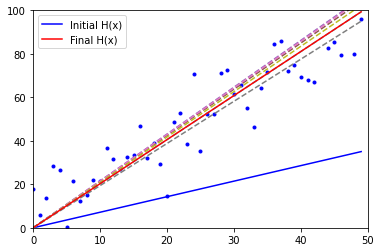

In [ ]:
plt.plot(X, y, 'b.')

W = np.random.rand()
plt.plot(X, W*X, 'b', label='Initial H(x)')
print('initial W', W)

t0, t1 = 1, 100
epochs = 50
batches = 5
for epoch in range(epochs):
    for i in range(int(m/batches)):
        random_i = np.random.randint(0,m, (batches,))
        xi = X[random_i]
        yi = y[random_i]
        h = W*xi
        cost = 1/batches* np.sum((h-yi)**2)
        gradient = 2/batches* np.sum((h-yi) * xi)
        learning_rate = t0/(t1 + (epoch * (m + i*10)))
        #learning_rate = 0.0005
        W = W - learning_rate * gradient
    if epoch %5 ==0:
        print('epoch:',epoch, 'cost:', cost,' gradient:',gradient, ' W:', W, 'learn_rate:', learning_rate)
        plt.plot(X, W*X, '--')
print('Final W:', W)
plt.plot(X, W*X, 'r', label='Final H(x)')
plt.legend()
plt.axis([0, 50, 0, 100])

#### Scikit-learn API


* `SDGRegressor()`

[1.95429885] [0.10683141]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


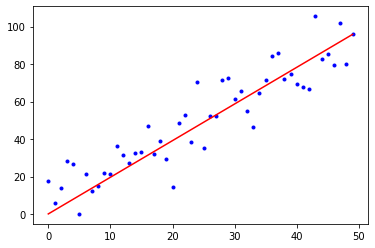

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

np.random.seed(0)
m = 50 #sample count
X = np.arange(m, dtype=np.float32).reshape(-1,1)
y = X  * 2 # W = 2, b=0(bias 생략) 
y = y + 10 * np.random.randn(m,1) # adding noise

#scaler = StandardScaler()
#X = scaler.fit_transform(X)
#y = scaler.fit_transform(y)

SGD = SGDRegressor(learning_rate='constant',eta0=0.00005)
SGD.fit(X,y)

w = SGD.coef_
b = SGD.intercept_
print(w,b)

plt.plot(X, y, 'b.')
plt.plot(X,w*X+b,'r-')



## 보스톤 주택가격, 회귀 예제


* `boston = load_boston()`
* DataFrame 생성

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
boston = load_boston()


In [ ]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


* `lr = LinearRegression()`
* `lr = SGDRegressor()`

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
scale = StandardScaler()
X = scale.fit_transform(boston.data)
X_train,X_test,y_train,y_test = train_test_split(X,boston.target,random_state=1)

for lr in [LinearRegression(),SGDRegressor()]:
  lr.fit(X_train,y_train)
  y_pred = lr.predict(X_test)
  r2_1 = lr.score(X_test,y_test)
  r2_2 = r2_score(y_test,y_pred)
  mae = mean_absolute_error(y_test,y_pred)
  mse = mean_squared_error(y_test,y_pred,squared=True)
  rmse = mean_squared_error(y_test,y_pred,squared=False)
  print("model:",lr.__class__.__name__)
  print('r2:',r2_1,r2_2,'mae',mae,'mse',mse,'rmse',rmse)


model: LinearRegression
r2: 0.7789410172622856 0.7789410172622856 mae 3.5748681261275443 mse 21.897765396049515 rmse 4.679504823808767
model: SGDRegressor
r2: 0.7787595728661166 0.7787595728661166 mae 3.567838455637149 mse 21.91573900096947 rmse 4.681424890027551


#  다항 회귀(Polynomial Variable Regression)
* 2차식 변환의 의미

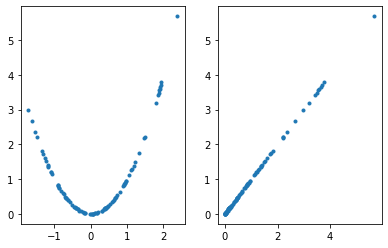

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.random.randn(100)
y = x**2

plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.plot(x, y, '.')

x2 =  x**2
plt.subplot(1,3,2)
plt.plot(x2, y, '.')

#### 다항식 샘플 생성

* ```
m = 100
X = 5 * np.random.rand(m, 1) - 3 # random -3 ~ 2, 100개
y = 2*X**2 + 3*X + 5 + np.random.randn(m, 1) # 2x^2 + 3x  + 5 + noise
```

(100, 1) (100, 1) [[-2.06903497]
 [ 1.72186195]
 [ 0.69775398]
 [-0.54770596]
 [-1.86292686]] [[ 6.89111053]
 [16.57668447]
 [ 6.52618613]
 [ 4.02010775]
 [ 6.50871893]]


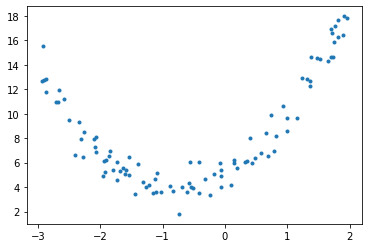

In [ ]:
m = 100
X = 5 * np.random.rand(m, 1) - 3 # random -3 ~ 2, 100개
y = 2*X**2 + 3*X + 5 + np.random.randn(m, 1) # 2x^2 + 3x  + 5 + noise

plt.plot(X,y,'.')
print(X.shape,y.shape,X[:5],y[:5])

#### scikit-learn API

* `PolynomialFeatures(drgree=2)` 연습

In [ ]:
from sklearn.preprocessing  import PolynomialFeatures

x = np.arange(10).reshape(-1,2)
#x2 = x**2
#np.stack((x,x2),axis=1)
poly = PolynomialFeatures(2,include_bias=False)
poly.fit(x)
poly.transform(x)

array([[ 0.,  1.,  0.,  0.,  1.],
       [ 2.,  3.,  4.,  6.,  9.],
       [ 4.,  5., 16., 20., 25.],
       [ 6.,  7., 36., 42., 49.],
       [ 8.,  9., 64., 72., 81.]])

* `PolynomialFeatures`
* `LinearRegression`

W: [[2.98494209 1.94863719]] b: [4.9927978]


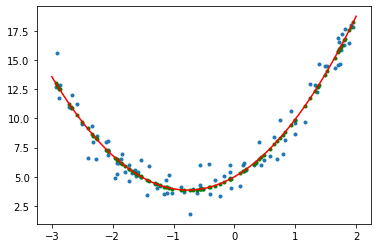

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

plt.plot(X, y, '.')

poly = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly.fit_transform(X)

#print(X[0],X_poly[0])

lr = LinearRegression()
lr.fit(X_poly,y)

y_pred = lr.predict(X_poly)
plt.plot(X,y_pred,'g.',label='predict')

w = lr.coef_
b = lr.intercept_
X_range = np.linspace(-3,2,100).reshape(-1,1)
X_range_poly = poly.fit_transform(X_range)
plt.plot(X_range,np.dot(X_range_poly,w.T)+b,'r-')
print("W:",w,'b:',b)

### 다항 회귀와 과적합

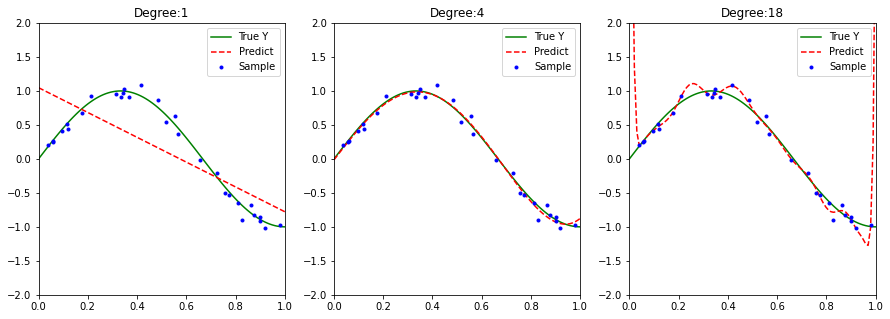

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

def sin(X):
    return np.sin(1.5 * np.pi * X)
    #return np.sin( X)

m = 30
X = np.sort(np.random.rand(m))
y = sin(X) + np.random.randn(m) * 0.1

degrees = (1, 4, 18)
plt.figure(figsize=(15,5))

for i, degree  in enumerate(degrees):
    polynomial = PolynomialFeatures(degree=degree)
    lr = LinearRegression()
    pipe = Pipeline([('polynomial', polynomial), ('linear_regression', lr)])
    pipe.fit(X.reshape(-1,1), y)
    
    X_test = np.linspace(0,1, 100)
    plt.subplot(1, len(degrees), i+1)
    plt.plot(X_test, sin(X_test), 'g-', label='True Y')
    plt.plot(X_test, pipe.predict(X_test[:, np.newaxis]), 'r--', label='Predict')
    plt.plot(X, y, 'b.', label='Sample')
    plt.xlim((0,1)); plt.ylim((-2,2))
    plt.legend()
    plt.title(f"Degree:{degree}")
    
plt.show()

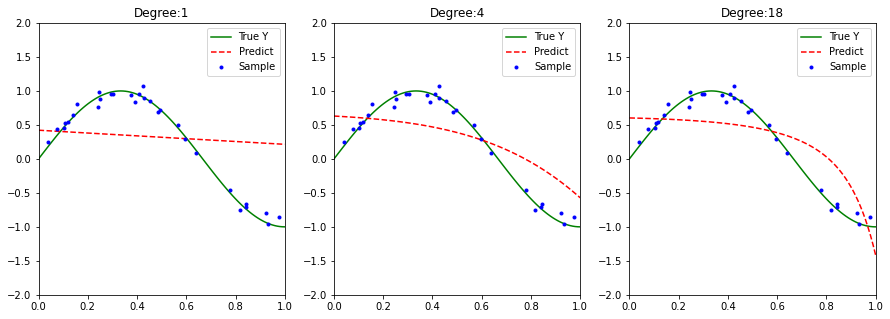

In [ ]:
def sin(X):
    return np.sin(1.5 * np.pi * X)
    #return np.sin( X)

m = 30
X = np.sort(np.random.rand(m))
y = sin(X) + np.random.randn(m) * 0.1

degrees = (1, 4, 18)
plt.figure(figsize=(15,5))

for i, degree  in enumerate(degrees):
    polynomial = PolynomialFeatures(degree=degree)
    sgd = SGDRegressor()
    pipe = Pipeline([('polynomial', polynomial), ('sgd', sgd)])
    pipe.fit(X.reshape(-1,1), y)
    
    X_test = np.linspace(0,1, 100)
    plt.subplot(1, len(degrees), i+1)
    plt.plot(X_test, sin(X_test), 'g-', label='True Y')
    plt.plot(X_test, pipe.predict(X_test[:, np.newaxis]), 'r--', label='Predict')
    plt.plot(X, y, 'b.', label='Sample')
    plt.xlim((0,1)); plt.ylim((-2,2))
    plt.legend()
    plt.title(f"Degree:{degree}")
    
plt.show()

### Ridge(릿지) 모델

* degree=18 
* Ridge 규제
  * alphas = (0, 0.01, 0.5, 1)

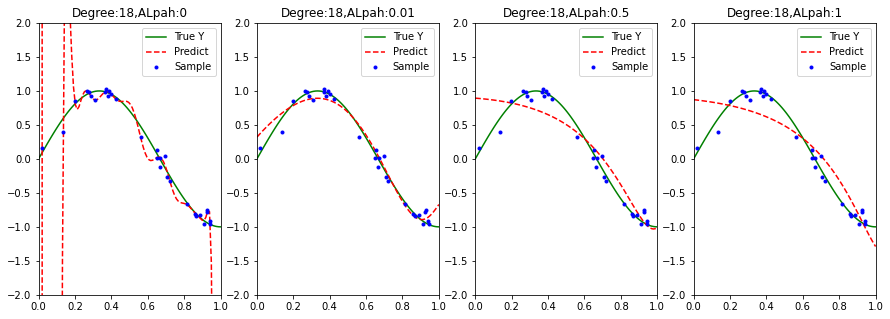

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

m = 30
X = np.sort(np.random.rand(m))
y = sin(X) + np.random.randn(m) * 0.1

alphas = (0, 0.01, 0.5, 1)
plt.figure(figsize=(15,5))
coef_df = pd.DataFrame()

for i , alpha in enumerate(alphas):
  poly = PolynomialFeatures(degree=18)
  ridge = Ridge(alpha)
  pipe = Pipeline([('poly',poly),('ridge',ridge)])
  pipe.fit(X.reshape(-1,1),y)

  X_test = np.linspace(0,1, 100)
  plt.subplot(1, len(alphas), i+1)
  plt.plot(X_test, sin(X_test), 'g-', label='True Y')
  plt.plot(X_test, pipe.predict(X_test[:, np.newaxis]), 'r--', label='Predict')
  plt.plot(X, y, 'b.', label='Sample')
  plt.xlim((0,1)); plt.ylim((-2,2))
  plt.legend()
  plt.title(f"Degree:{degree},ALpah:{alpha}")
 

#### Ridge 모델, 보스턴 주택 가격 실습

* alphas = (0.05, 0.1, 0.5, 1, 2)

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

boston = load_boston()

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(boston.data)
X_train, X_test, y_train, y_test = train_test_split(X, boston.target, random_state=1)

alphas = (0.001, 0.05, 0.1, 1, 10, 100)
coef_df = pd.DataFrame()

for i, alpha in enumerate(alphas):
  ridge = Ridge(alpha)
  ridge.fit(X_train,y_train)
  y_pred = ridge.predict(X_test)

  rmse = mean_squared_error(y_test,y_pred,squared=False)
  mae = mean_absolute_error(y_test,y_pred)
  r2=r2_score(y_test,y_pred)

  print(f"alpha:{alpha}, rmse:{rmse}, mae:{mae}, r2:{r2}")
  coef_df[f'alpha:{alpha}'] = pd.Series(data=ridge.coef_,index=boston.feature_names)
coef_df

alpha:0.001, rmse:4.6795044667037295, mae:3.5748659852122047, r2:0.7789410510014423
alpha:0.05, rmse:4.679487786168399, mae:3.5747611522163005, r2:0.7789426269696086
alpha:0.1, rmse:4.679472406836075, mae:3.5746543253576517, r2:0.7789440799958247
alpha:1, rmse:4.679462417128048, mae:3.5727572341548886, r2:0.7789450238123705
alpha:10, rmse:4.6965226192437415, mae:3.5729576044525757, r2:0.7773302583712065
alpha:100, rmse:5.10314552391644, mae:3.8131330972917024, r2:0.7371038205702087


,alpha:0.001,alpha:0.05,alpha:0.1,alpha:1,alpha:10,alpha:100
CRIM,-0.983282,-0.982758,-0.982226,-0.972922,-0.901227,-0.684779
ZN,1.331064,1.329609,1.328130,1.302316,1.106125,0.587967
INDUS,0.262460,0.260799,0.259112,0.229980,0.027896,-0.359440
CHAS,0.616231,0.616433,0.616638,0.620157,0.642967,0.655763
NOX,-2.457913,-2.455895,-2.453839,-2.417471,-2.109550,-1.000074
RM,2.019611,2.020366,2.021134,2.034566,2.137164,2.257227
AGE,0.194336,0.193656,0.192963,0.180816,0.083807,-0.223786
DIS,-3.095621,-3.093561,-3.091463,-3.054276,-2.732600,-1.360921
RAD,2.659805,2.654653,2.649419,2.558893,1.920150,0.521880
TAX,-1.797262,-1.792418,-1.787499,-1.702948,-1.140693,-0.342119


### LASSO(라쏘) 모델


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.030e-01, tolerance: 1.648e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coe

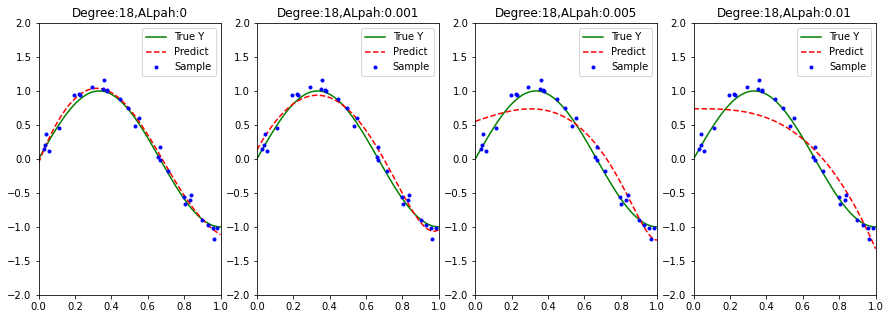

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

def sin(X):
    return np.sin(1.5 * np.pi * X)

m = 30
X = np.sort(np.random.rand(m))
y = sin(X) + np.random.randn(m) * 0.1

alphas = (0, 0.001, 0.005, 0.01)
plt.figure(figsize=(15,5))
coef_df = pd.DataFrame()

for i , alpha in enumerate(alphas):
  poly = PolynomialFeatures(degree=18)
  lasso = Lasso(alpha)
  pipe = Pipeline([('poly',poly),('lasso',lasso)])
  pipe.fit(X.reshape(-1,1),y)

  X_test = np.linspace(0,1, 100)
  plt.subplot(1, len(alphas), i+1)
  plt.plot(X_test, sin(X_test), 'g-', label='True Y')
  plt.plot(X_test, pipe.predict(X_test[:, np.newaxis]), 'r--', label='Predict')
  plt.plot(X, y, 'b.', label='Sample')
  plt.xlim((0,1)); plt.ylim((-2,2))
  plt.legend()
  plt.title(f"Degree:{degree},ALpah:{alpha}")


#### 보스턴 주택가격, 계수 제거 실습

* alphas = (0.05, 0.1, 0.5, 1, 2)

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

boston = load_boston()


In [ ]:
X = scaler.fit_transform(boston.data)
X_train, X_test, y_train, y_test = train_test_split(X, boston.target,random_state=1)

alphas = (0.05, 0.1, 0.5, 1, 2)
coef_df = pd.DataFrame()

for i, alpha in enumerate(alphas):
  lasso = Lasso(alpha)
  lasso.fit(X_train,y_train)
  y_pred = lasso.predict(X_test)

  rmse = mean_squared_error(y_test,y_pred,squared=False)
  mae = mean_absolute_error(y_test,y_pred)
  r2=r2_score(y_test,y_pred)

  print(f"alpha:{alpha}, rmse:{rmse}, mae:{mae}, r2:{r2}")
  coef_df[f'alpha:{alpha}'] = pd.Series(data=lasso.coef_,index=boston.feature_names)
coef_df

alpha:0.05, rmse:4.716256554673032, mae:3.5927785031067203, r2:0.7754550914141721
alpha:0.1, rmse:4.802008652178985, mae:3.6587382146590595, r2:0.7672154004841856
alpha:0.5, rmse:5.350671316177976, mae:4.083128598854441, r2:0.7109819836128304
alpha:1, rmse:5.736148279724385, mae:4.323151508271125, r2:0.667838642112031
alpha:2, rmse:6.462570708386732, mae:4.674142957997764, r2:0.5783821548906841


,alpha:0.05,alpha:0.1,alpha:0.5,alpha:1,alpha:2
CRIM,-0.857118,-0.725242,-0.213611,-0.034092,-0.000000
ZN,1.047647,0.808085,0.000000,0.000000,0.000000
INDUS,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
CHAS,0.622530,0.618864,0.373022,0.012047,0.000000
NOX,-2.134354,-1.943275,-0.135075,-0.000000,-0.000000
RM,2.106414,2.174180,2.275401,1.981483,1.437104
AGE,0.000000,0.000000,-0.000000,-0.000000,-0.000000
DIS,-2.811277,-2.410457,-0.052239,-0.000000,0.000000
RAD,1.750752,0.974199,-0.000000,-0.000000,-0.000000
TAX,-0.943264,-0.271461,-0.000000,-0.000000,-0.000000


# Logistic Regression


#### Sigmoid 함수 그리기

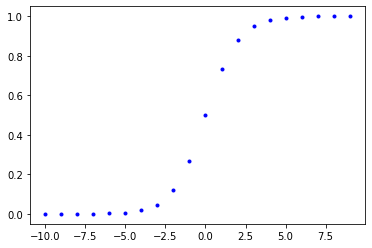

In [ ]:
x = np.arange(-10,10,1)
plt.plot(x,1/(1+np.e**(-x)),'b.')

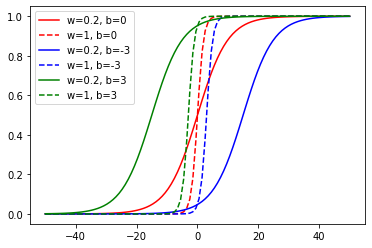

In [ ]:
def sigmoid(z):
    return  1/(1+np.exp(-z))

def drawSigmoid(w=0.5, b=0, style='-', label=None, x=None):
    if x is None :
        x=np.linspace(-50,50,100).reshape(-1,1)
    else:
        x = np.linspace(np.min(x), np.max(x), 100).reshape(-1,1)
    
    y = sigmoid(x * w + b)
    plt.plot(x, y, style, label=label)
    
drawSigmoid(0.2,  0, 'r', label="w=0.2, b=0")
drawSigmoid(  1,  0, 'r--', label='w=1, b=0')

drawSigmoid(0.2, -3, 'b', label='w=0.2, b=-3')
drawSigmoid(  1, -3, 'b--', label='w=1, b=-3')

drawSigmoid(0.2,  3, 'g', label='w=0.2, b=3')
drawSigmoid(  1,  3, 'g--', label='w=1, b=3')
plt.legend()

#### 로지스틱 회귀 실습: 랜덤수 분류

((50, 2), (50,))

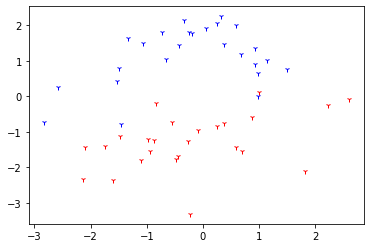

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=50, n_features=2,
                           n_informative =2, n_redundant=0, n_repeated=0,
                           n_classes=2, random_state=1)

plt.plot(X[y==0][:,0],X[y==0][:,1], 'r1')
plt.plot(X[y==1][:,0],X[y==1][:,1], 'b1')
X.shape, y.shape

*  LogisticRegression()

acc: 0.94 0.94


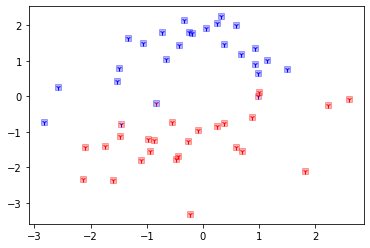

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression()
lr_clf.fit(X,y)
y_pred = lr_clf.predict(X)

print('acc:',lr_clf.score(X,y),accuracy_score(y,y_pred))

plt.plot(X[y==0][:,0],X[y==0][:,1], 'r1')
plt.plot(X[y==1][:,0],X[y==1][:,1], 'b1')

plt.plot(X[y_pred==0][:,0],X[y_pred==0][:,1], 'rs',alpha=0.3)
plt.plot(X[y_pred==1][:,0],X[y_pred==1][:,1], 'bs',alpha=0.3)

#### 로지스틱 회귀 실습: 위스콘신 유방암 

* load_breast_cancer()

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
scaler = StandardScaler()
scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(scaled, cancer.target, random_state=0)

lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred= lr_clf.predict(X_test)

print('train acc:',lr_clf.score(X_train,y_train),'test acc:',accuracy_score(y_test,pred))


train acc: 0.9906103286384976 test acc: 0.965034965034965


auc: 0.9605870020964361
[1.99999999e+00 9.99999993e-01 9.81811146e-01 9.80646974e-01
 7.83770972e-01 6.74902032e-01 5.84832901e-01 5.61947623e-01
 4.50636397e-01 3.77796527e-01 3.10262780e-01 1.78139565e-13]
best thresh: 0.4506363967952674


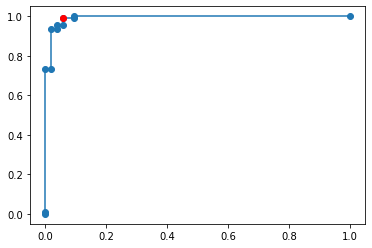

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

y_proba = lr_clf.predict_proba(X_test)

fpr, tpr, thresh = roc_curve(y_test, y_proba[:, 1])
print('auc:', roc_auc_score(y_test, pred  ))
print(thresh)
plt.plot(fpr, tpr, marker='o')
#for i, t in enumerate(thresh):
#  plt.annotate(f'{t:.2f}', xy=(fpr[i], tpr[i]))
gmean = np.sqrt(tpr -fpr)
idx = np.argmax(gmean)
plt.plot(fpr[idx], tpr[idx], 'or')
print('best thresh:', thresh[idx])

In [ ]:
y_pred_thresh = y_proba[:, 1] > thresh[idx]
roc_auc_score(y_test, y_pred_thresh)

0.9605870020964361

thresh 를 적용한거나 그냥 predict() 한거나 결과가 같다.

In [ ]:
np.all(pred == y_pred_thresh)

True

In [ ]:
np.all(pred == (y_proba[:, 1] > 0.5))

True